# Tutorial: Recursive Sequences

## Computational Economics  (ECO309)


## Recursive sequence

Take random $\lambda_1, \lambda_2$ such that $0<|\lambda_1|<|\lambda_2|$. Set $a=\lambda_1+\lambda_2$ and $b=\lambda_1 \lambda_2$. In this exercise, we consider an algorithm to determine $\lambda_1$ from $a$ and $b$.

Consider the function $f(x) = -\frac{b}{x - a}$ and the recursive series $x_n=f(x_{t-1})$

__Show mathematically that $f$ has two fixed points: $\lambda_1$ and $\lambda_2$.__

If you consider the second order equation $x^2 - a x + b$, we know the roots $x_1$ and $x_2$ of this equation are such that $a=x_1+x_2$ and $b=x_1 x_2$.

Consider the second order recursive sequence defined by  $x_{n+1} - a x_n + b x_{n-1} = 0$. 


Look for fundamental solutions $x_n = x_n(x_{n-1}) = \lambda x_{n-1}$. These fundamental solutions are called decision rules. For these solutions $\lambda$ is a root of the characteristic polynomial $X^2 - aX + b$. 

$x_{n+1}(x_n (x_{n-1})) - a x_n (x_{n-1}) + b x_{n-1} = 0$

If the decision rule $\varphi$ is invariant over time: 
$\varphi(\varphi (x_{n-1})) - \varphi (x_{n-1}) + b x_{n-1} = 0$

But if the decision for $x_{n+1}$ is $\tilde{\varphi}(x_n)$, we have a relationship between the decision today (n), and the decision rule tomorrow (n+1)

$\tilde{\varphi}(\varphi (x_{n-1})) - \varphi (x_{n-1}) + b x_{n-1} = 0$

When the decision rules are linear: $\tilde{\varphi}(s) = \tilde{\lambda} s$ and the decision rule today ${\varphi}(s) = {\lambda} s$. They are linked with :

$\tilde{\lambda} \lambda x_{n-1} - a \lambda x_{n_1} + b x_{n-1} = 0$

This must be true for all $x_{n-1}$ so that:

$$\tilde{\lambda} \lambda - a \lambda + b  = 0$$


The function which gives the decision rule today, as a function of the decision rule tomorrow ($\tilde{\lambda}$) is:

$\lambda = f(\tilde{\lambda}) = \frac{-b}{\tilde{\lambda}-a}$

This is called "backward iteration" and in this instance, can be used to select one of the solutions.

__Choose numerical values for $\lambda_1$ and $\lambda_2$__

In [4]:
λ1 = 0.5
λ2 = 1.1

1.1

In [5]:
a = λ1 + λ2
b = λ1*λ2

0.55

__Choose initial $x_0$ and compute several of function $f$.__

In [10]:
f(x::Float64) = -b/(x - a)

f (generic function with 1 method)

In [11]:
f(λ2)

1.1

In [12]:
f(λ1)

0.5

In [13]:
x0 = 1.9

1.9

In [14]:
function iterate(f, x0::Float64, n::Int64)
    for i in 1:n
        x=f(x0)
        x0 = x
    end
    return x0
end

iterate (generic function with 1 method)

In [15]:
@time iterate(f, x0, 1000000)

  0.191806 seconds (4.00 M allocations: 61.035 MiB, 10.41% gc time)


0.5

__Check that the iterations converge to a fixed point__

In [16]:
function iterate(f, x0::Float64, n::Int64; trace=false)
    log = [x0]
    for i in 1:n
        x=f(x0)
        x0 = x
        if trace
            push!(log, x)
        end 
    end
    if trace
        return x0, log
    else
        return x0
    end
end

iterate (generic function with 1 method)

In [32]:
xstar, trace = iterate(f, x0, 20; trace=true)

(0.49999985115447215, [1.9, -1.8333333333333346, 0.1601941747572815, 0.38199595414699933, 0.45155843436859877, 0.4789098692170861, 0.49059391827480203, 0.49576075799468716, 0.49808046941095196, 0.49912900600462995  …  0.49982024958645205, 0.4999183086157147, 0.49996287031003006, 0.4999831234378514, 0.4999923289530787, 0.49999651318480626, 0.49999841508902676, 0.4999992795869593, 0.49999967253974137, 0.49999985115447215])

In [33]:
using Plots

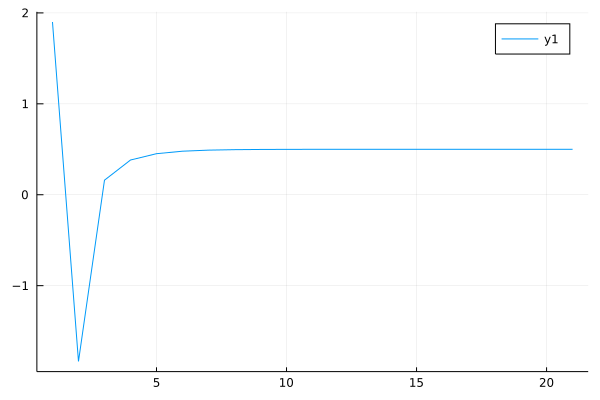

In [34]:
plot(trace)

Graphically the series is converging. To confirm it numerically, we can look at successive approximation errors $\eta_n = |x_n - x_{n-1}|$, and ratio of successive approximation errors $\lambda_n = \frac{\eta_n}{\eta_{n-1}}$

In [35]:
η_vec = trace[2:end] - trace[1:(end-1)]
λ_vec = η_vec[2:end] ./ η_vec[1:(end-1)]

19-element Array{Float64,1}:
 -0.533980582524272
  0.11126095751854345
  0.31362453634501447
  0.3931923468133416
  0.4271823077085149
  0.4422131141663643
  0.4489613655591342
  0.45201165383163794
  0.4533946381793901
  0.4540225442515068
  0.45430780688185646
  0.45443744090135624
  0.4544963590925194
  0.4545231387726822
  0.45453531108476297
  0.4545408438979726
  0.45454335880772956
  0.45454450185518896
  0.454545021498741

In [36]:
log.(abs.(η_vec))

20-element Array{Float64,1}:
   1.3173014896329394
   0.6899056866357749
  -1.505971181601577
  -2.6655299342720284
  -3.5989862890227093
  -4.449530695756461
  -5.265494050114648
  -6.066312490581972
  -6.860359807250891
  -7.651352174035899
  -8.440960599267909
  -9.229940921212668
 -10.01863593983244
 -10.807201316026667
 -11.59570777229622
 -12.38418744852301
 -13.172654952363185
 -13.961116923361079
 -14.749576379646129
 -15.538034692713623

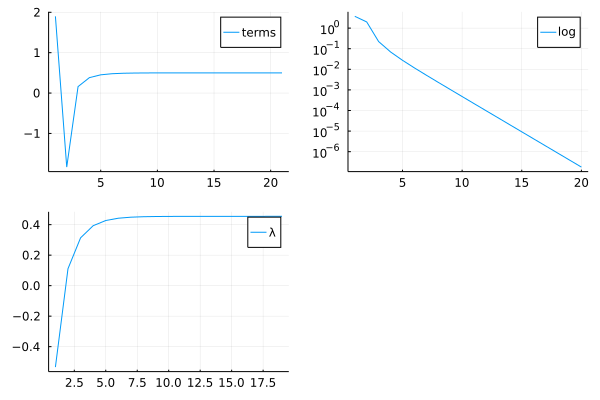

In [38]:
pl1 = plot(trace, label="terms")
pl2 = plot(abs.(η_vec), label="log(\\eta)", yaxis=:log)
pl3 = plot(λ_vec, label="λ")

plot(pl1, pl2, pl3)

According to the graphs, it is clear, that the series converges geometrically.

__Accelerate the convergence__

In [42]:
function iterate(f, x0::Float64, n::Int64; trace=false, μ=1.0)
    log = [x0]
    for i in 1:n
        Δ = f(x0) - x0
        x= x0 + μ * Δ
        x0 = x
        if trace
            push!(log, x)
        end 
    end
    if trace
        return x0, log
    else
        return x0
    end
end

iterate (generic function with 1 method)

In [50]:
xstar , trace = iterate(f, x0, 10; trace=true)

(0.49960440687413843, [1.9, -1.8333333333333344, 0.16019417475728148, 0.38199595414699933, 0.45155843436859877, 0.4789098692170861, 0.49059391827480203, 0.49576075799468716, 0.49808046941095196, 0.49912900600462995, 0.49960440687413843])

In [54]:
xstar

0.49960440687413843

In [52]:
x0, x1, x2 = trace[end-2:end]

3-element Array{Float64,1}:
 0.49808046941095196
 0.49912900600462995
 0.49960440687413843

In [53]:
xaitken = x0 - (x1-x0)^2/(x2 - 2*x1 + x0)

0.4999987392760436

In [47]:
iterate(f, x0, 10; μ=1.1)

0.49993597123775846

In [56]:
function iterate_aitken(f, x0, n)
    for i =1:n
        x1 = f(x0)
        x2 = f(x1)
        xaitken = x0 - (x1-x0)^2/(x2 - 2*x1 + x0)
        x0 = xaitken
    end
    return x0
end

iterate_aitken (generic function with 2 methods)

In [65]:
iterate_aitken(f, 0.49, 3)

0.4999999999999999

In [ ]:
# when very close to the solution the aitken/stephensen's method makes divisions by 0
# one has to to implement a check to avaid them

__Write a function `iteration(f::Function, x0; accelerate=false)` which the fixed point of recursive function $f$ with optional acceleration__

In [66]:
function iteration(f, x0, n;accelerate=false)
    if accelerate
        return iterate_aitken(f, x0, n)
    else
        return iterate(f, x0, n)
    end
end


iteration (generic function with 1 method)

__Bonus: show that $x_n$ always converges to $\lambda_1$__ (always to the smaller eigenvalue)

## Solow model

This model tries to explain long-term growth, its relation to productivity and population growth and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Create a dictionary to hold parameter values.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [ ]:
# We'll create a dictionary of parameters
p = Dict(
    :α=>0.3,
    :β=>0.96,
    :δ=>0.1,
    :g=>1.01,
    :s=>0.2
)

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

simulate (generic function with 4 methods)

__Propose and implement a way to accelerate convergence__

__What factors affect the steady-state level of capital?__

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

__Compute the steady-state directly using a Newton method and compare convergence speed.__

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__

